## How to read data using sqlite3

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"C:\Users\Bahar\Desktop\zomato_rawdata.sqlite")

In [4]:
df = pd.read_sql_query('select * from Users', con)

In [5]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


## Missing data

In [6]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

so lets replace 'NEW' & '-' with np.nan or with "missing value" ,so that we can fill later it with some value..

In [9]:
df['rate'].replace(('NEW' , '-') , np.nan , inplace=True)

we need rating as 4.1 not as '4.1/5' , ie we need to fix it

In [10]:
"4.1/5".split('/')[0]

'4.1'

In [11]:
type("4.1/5".split('/')[0])

str

In [12]:
float("4.1/5".split('/')[0])

4.1

In [13]:
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

## Is there a relation between online order option and rating of the restaurant 

In [14]:
### lets find out relation b/w rating & online_order
### ie how many restaurants that have rating 0 , 1 , 1.2 , 1.4 , 1.6--- & that accepts online_order & do not accept order
### for such problem statement , we will create frequency tables..
cross_table = pd.crosstab(df['rate'] , df['online_order'])
cross_table

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<AxesSubplot:xlabel='rate'>

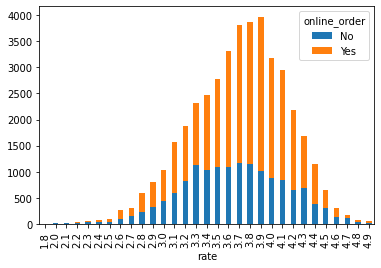

In [15]:
cross_table.plot(kind='bar' , stacked=True)

In [16]:
cross_table.sum()

online_order
No     14459
Yes    27206
dtype: int64

In [17]:
cross_table.sum(axis=1)

rate
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
2.4      70
2.5     101
2.6     260
2.7     307
2.8     600
2.9     802
3.0    1023
3.1    1561
3.2    1873
3.3    2310
3.4    2476
3.5    2784
3.6    3316
3.7    3821
3.8    3873
3.9    3972
4.0    3183
4.1    2948
4.2    2184
4.3    1693
4.4    1147
4.5     656
4.6     300
4.7     167
4.8      66
4.9      55
dtype: int64

In [18]:
normalize_cross_table = cross_table.div(cross_table.sum(axis=1).astype(float) , axis=0)

<AxesSubplot:xlabel='rate'>

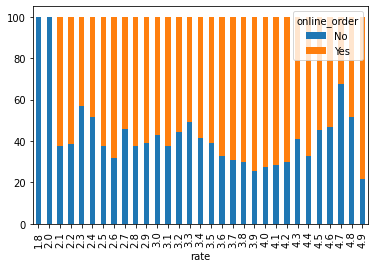

In [19]:
(normalize_cross_table*100).plot(kind='bar' , stacked=True)


Data Cleaning to perform Text Analysis

Perform Text Analysis.. ie analysing customer reviews of Quick Bites restaurant : 

ways to do it..

a) using wordcloud

    But wordcloud will not give a clear cut , how important words are
    So lets use a concept of frequency over here...

b) using plots/charts-- where each word have some frequency..

We need Pre-processed data so that we can plot charts

ie  (Biryani , 10K)
    (Chicken , 15K)
    etc..

In [20]:
df['rest_type'].isnull().sum()

227

In [21]:
data = df.dropna(subset=['rest_type'])

In [22]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [23]:
### extracting data of 'Quick Bites' only ..
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

How to Perform Data Pre-processing to pre-process this data..
    Steps-->>
    
  a) Perform Lower-case operation
        
  b) Do tokenization
        
  c) Removal of stopwords from data
        
  d) Store your entire data in the list so that we can commpute       frequency of each word
  
  e) Do plotting , using Unigram  , bigram & Trigram analysis..

In [24]:
# Converting all the text to lowercase
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())

C:\Users\Bahar\AppData\Local\Temp/ipykernel_15248/2984171695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())


In [25]:
from nltk.corpus import RegexpTokenizer

In [26]:
quick_bites_df['reviews_list'].head()

3     [('rated 4.0', "rated\n  great food and proper...
23    [('rated 4.0', "rated\n  so, went here with fr...
26    [('rated 5.0', 'rated\n  please provide some e...
31    [('rated 1.0', "rated\n  worst restaurant ever...
34    [('rated 3.0', 'rated\n  not worth for the mon...
Name: reviews_list, dtype: object

In [27]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

What does it mean to tokenize a string in Python?
In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.

In [28]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [29]:
sample = data[0:10000]

In [30]:
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

## Performing Unigram analysis & removal of stopwords

In [31]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [32]:
from nltk.corpus import stopwords

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bahar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# These are common words defined by Python developers that typically don't add meaning to the text and can be removed
stop = stopwords.words('english')

In [35]:
# Adding custom words to stopwords 
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [36]:
### with respect to fourth row, how to remove stopwords
rev3 = reviews_tokens[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [37]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [38]:
## remove stopwords from "reviews_tokens" Series ..
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

### Store entire data in the list so that we can compute frequency of each word

In [39]:
type(reviews_tokens_clean)

pandas.core.series.Series

list( reviews_tokens_clean ) gives us 2-D list (list inside list) , 
    as each row is already a list & then we will convert this 2-D list into 1-D list

In [40]:
total_reviews_2D = list(reviews_tokens_clean)

In [41]:
total_reviews_2D[0][0]

'A'

In [42]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [43]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [44]:
type(total_reviews_1D)

list

##  Unigram analysis

In [45]:
from nltk import FreqDist

In [46]:
freq_dist = FreqDist(total_reviews_1D)

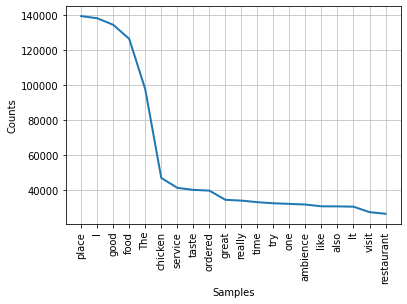

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [47]:
freq_dist.plot(20)

##  Performing Bi-gram & Trigram analysis on data

In [48]:
from nltk import FreqDist , bigrams , trigrams

In [49]:
# Generating bigrams from the reviews
bi_grams = bigrams(total_reviews_1D)

In [50]:
bigram_freq_dist = FreqDist(bi_grams)

In [51]:
bigram_freq_dist.most_common(50)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078),
 (('food', 'I'), 3998),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658),
 (('I', 'love'), 3529),
 (('quality', 'food'), 3510),
 (('nWe', 'ordered'), 3490),
 (('time', 'I'), 3398),
 (('nice', 'place'), 3290),
 (('The', 'staff'), 3286),
 (('taste', 'good'), 3275),
 (('pretty', 'good'), 3270),
 (('fried', 'rice'), 3127),
 (('pocket', 'friendly'), 3097),
 (('place', 'good'), 3083),
 (('I', 'loved'), 

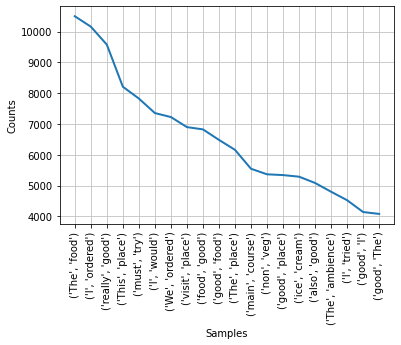

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [52]:
bigram_freq_dist.plot(20)

In [53]:
# Generating bigrams from the reviews
tri_grams = trigrams(total_reviews_1D)
trigram_freq_dist = FreqDist(tri_grams)
trigram_freq_dist.most_common(50)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'staff', 'friendly'), 561),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('Overall', 'good', 'experience'), 558),
 (('I', 'love', 'place'), 554),
 (('paneer', 'butter', 'masala'), 554),
 (('really', 'good', 'The'), 552)

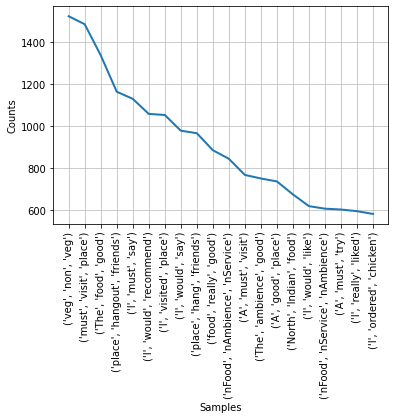

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [54]:
trigram_freq_dist.plot(20)

In [55]:
#!pip install geocoder
#!pip install geopy

In [56]:
df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [57]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [58]:
### Lets add 'Bangalore , Karnataka , India' so that u will get more more accurate geographical co-ordinates..

df['location'] = df['location'] + " , Bangalore  , Karnataka , India "

In [59]:
df['location'].isnull().sum()

21

In [60]:
df_copy = df.copy()

In [61]:
df_copy = df_copy.dropna(subset=['location'])

In [62]:
locations = pd.DataFrame(df_copy['location'].unique())

In [63]:
locations.columns = ['name']

In [64]:
locations.head()

,name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , ..."


In [65]:
from geopy.geocoders import Nominatim

In [66]:
### assign timeout=None in order to get rid of timeout error..
geolocator = Nominatim(user_agent="app" , timeout=None)

In [67]:
lat=[]
lon=[]

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    

In [68]:
locations['latitude'] = lat
locations['longitude'] = lon

In [69]:
locations.head()

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915221,77.573598
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.908149,77.555318


In [70]:
from geopy.geocoders import Nominatim

def get_lat_lon(address):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(address)
    if location:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None

address = "543 burnage lane, m19 1nh, manchester"
latitude, longitude = get_lat_lon(address)

if latitude is not None and longitude is not None:
    print(f"Latitude: {latitude}, Longitude: {longitude}")
else:
    print("Address not found.")


Latitude: 53.4248694, Longitude: -2.2030853


## Lets build geographical Heat-Maps

In [71]:
### lets figure it out whether we have misssing values or not !
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [72]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [73]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [74]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [75]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [76]:
df['cuisines'].isnull().sum()

45

In [77]:
df = df.dropna(subset=['cuisines'])

In [78]:
### lets find it out what are those areas where we have most number of North-Indian restaurants ?
## ie lets extract dataframe of only 'North Indian' cuisine restaurant..

north_india = df[df['cuisines'].str.contains('North Indian')]

In [79]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [80]:
north_india['location'].value_counts()

BTM , Bangalore  , Karnataka , India                   2469
HSR , Bangalore  , Karnataka , India                   1123
Whitefield , Bangalore  , Karnataka , India            1059
Marathahalli , Bangalore  , Karnataka , India          1038
JP Nagar , Bangalore  , Karnataka , India               958
                                                       ... 
Hebbal , Bangalore  , Karnataka , India                   4
Jakkur , Bangalore  , Karnataka , India                   3
Central Bangalore , Bangalore  , Karnataka , India        2
West Bangalore , Bangalore  , Karnataka , India           1
Peenya , Bangalore  , Karnataka , India                   1
Name: location, Length: 90, dtype: int64

In [87]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})

In [88]:
north_india_rest_count.head()

,name,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958


In [90]:
### lets create Heatmap of this results so that it becomes more user-friendly..
## now In order to perform Spatial Anlysis(Geographical Analysis) , we need latitudes & longitudes of every location..

### so lets merge both the dataframes or append one into another in order to get geographical co-ordinates..
heatmap_df = north_india_rest_count.merge(locations , on='name' , how='left')

In [91]:
heatmap_df.head()

,name,count,latitude,longitude
0,"BTM , Bangalore , Karnataka , India",2469,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",1123,12.911623,77.638862
2,"Whitefield , Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.912076,77.579393


In [94]:
#!pip install folium

import folium

In [95]:
basemap = folium.Map()

In [96]:
basemap

In [97]:
from folium.plugins import HeatMap

In [98]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [99]:
HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)

In [100]:
basemap

## Perform Automation

In [101]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})
    heatmap_df = cuisine_rest_count.merge(locations , on='name' , how='left')
    print(heatmap_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)
    return basemap

In [103]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [104]:
get_heatmap('Arabian')

                                                name  count   latitude  \
0              BTM , Bangalore  , Karnataka , India     236  12.911276   
1  Bannerghatta Road , Bangalore  , Karnataka , I...     55  12.827844   
2  Koramangala 7th Block , Bangalore  , Karnataka...     48  12.936485   
3       Whitefield , Bangalore  , Karnataka , India      46  12.969637   

   longitude  
0  77.604565  
1  77.586959  
2  77.613478  
3  77.749745  
